# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [15]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [16]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [17]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [18]:
model = torch.nn.Linear(28*28, 10)

In [19]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.4934, -0.3871,  0.2182, -0.0084, -0.0530,  0.4159, -0.0388,  0.7564,
          0.5367, -1.0421]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [20]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [21]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        
        # === PRINT DO EXERCÍCIO ===
        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}, loss: {loss.item():.4f}")

Época: 1/5, batch: 1/600, loss: 2.2915
Época: 1/5, batch: 2/600, loss: 1.8757
Época: 1/5, batch: 3/600, loss: 1.5563
Época: 1/5, batch: 4/600, loss: 1.4084
Época: 1/5, batch: 5/600, loss: 1.2759
Época: 1/5, batch: 6/600, loss: 1.1839
Época: 1/5, batch: 7/600, loss: 1.0598
Época: 1/5, batch: 8/600, loss: 1.0306
Época: 1/5, batch: 9/600, loss: 0.9879
Época: 1/5, batch: 10/600, loss: 0.9755
Época: 1/5, batch: 11/600, loss: 0.9103
Época: 1/5, batch: 12/600, loss: 0.7767
Época: 1/5, batch: 13/600, loss: 0.8068
Época: 1/5, batch: 14/600, loss: 0.6579
Época: 1/5, batch: 15/600, loss: 0.7008
Época: 1/5, batch: 16/600, loss: 0.7711
Época: 1/5, batch: 17/600, loss: 0.6530
Época: 1/5, batch: 18/600, loss: 0.6556
Época: 1/5, batch: 19/600, loss: 0.5297
Época: 1/5, batch: 20/600, loss: 0.6393
Época: 1/5, batch: 21/600, loss: 0.7141
Época: 1/5, batch: 22/600, loss: 0.7173
Época: 1/5, batch: 23/600, loss: 0.7311
Época: 1/5, batch: 24/600, loss: 0.5078
Época: 1/5, batch: 25/600, loss: 0.6521
Época: 1/

In [28]:
def treinar(batch_size):
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

    model = torch.nn.Linear(28*28, 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    criterion = torch.nn.CrossEntropyLoss()

    epochs = []
    losses = []
    total_trained = 0

    for e in range(n_epochs):
        for k,(x_train, y_train) in enumerate(loader_train):
            
            inputs = x_train.view(-1, 28*28)
            outputs = model(inputs)
            loss = criterion(outputs, y_train)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained += x_train.size(0)
            epochs.append(total_trained / total_samples)
            losses.append(loss.item())

    return epochs, losses


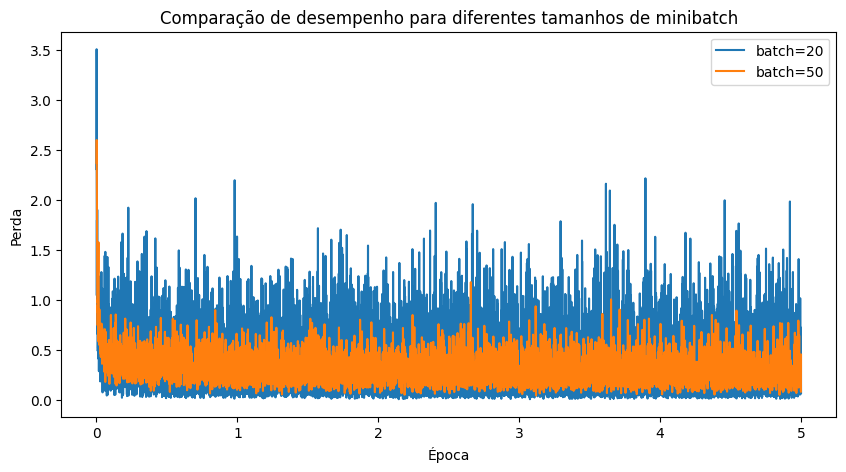

In [29]:
batch_sizes = [20, 50]

plt.figure(figsize=(10,5))

for bs in batch_sizes:
    ep, ls = treinar(bs)
    plt.plot(ep, ls, label=f'batch={bs}')

plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend()
plt.title("Comparação de desempenho para diferentes tamanhos de minibatch")
plt.show()


In [ ]:
print('Final loss:', loss.data)

### Visualizando gráfico de perda durante o treinamento

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?\
    batch_size = 100
2. Em uma época, quantos mini-batches existem?\
    600 mini-batches por época
3. Qual é a definição de época?\
    Quando a rede já percorreu todas as imagens de treino uma vez

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600\
    === PRINT DO EXERCÍCIO ===
        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}, loss: {loss.item():.4f}")
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.\
    FUNÇÃO: para treinar e retornar as perdas
    def treinar(batch_size):
        loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

        model = torch.nn.Linear(28*28, 10)
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
        criterion = torch.nn.CrossEntropyLoss()

        epochs = []
        losses = []
        total_trained = 0

        for e in range(n_epochs):
            for k,(x_train, y_train) in enumerate(loader_train):
                
                inputs = x_train.view(-1, 28*28)
                outputs = model(inputs)
                loss = criterion(outputs, y_train)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_trained += x_train.size(0)
                epochs.append(total_trained / total_samples)
                losses.append(loss.item())

        return epochs, losses

    Rodando com vários tamanhos diferentes\
    batch_sizes = [20, 50]\

    plt.figure(figsize=(10,5))\

    for bs in batch_sizes:\
        ep, ls = treinar(bs)
        plt.plot(ep, ls, label=f'batch={bs}')

    plt.xlabel("Época")
    plt.ylabel("Perda")
    plt.legend()
    plt.title("Comparação de desempenho para diferentes tamanhos de minibatch")
    plt.show()


## Conclusões sobre os experimentos deste notebook
